# Exploration of airlines delays 
## by Mathieu Le Cam

## Preliminary Wrangling

This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 2004 to 2020.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

Load the dataset into a pandas dataframe.

In [14]:
df=pd.read_csv('airline_delay_causes.csv')
print(df.info())
df.iloc[:,:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272070 entries, 0 to 272069
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 272070 non-null  int64  
 1    month               272070 non-null  int64  
 2   carrier              272070 non-null  object 
 3   carrier_name         272070 non-null  object 
 4   airport              272070 non-null  object 
 5   airport_name         272070 non-null  object 
 6   arr_flights          271671 non-null  float64
 7   arr_del15            271476 non-null  float64
 8   carrier_ct           271671 non-null  float64
 9    weather_ct          271671 non-null  float64
 10  nas_ct               271671 non-null  float64
 11  security_ct          271671 non-null  float64
 12  late_aircraft_ct     271671 non-null  float64
 13  arr_cancelled        271671 non-null  float64
 14  arr_diverted         271671 non-null  float64
 15   arr_delay       

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct
0,2004,1,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650.0,126.0,21.06,6.44
1,2004,1,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,14.09,2.61
2,2004,1,DL,Delta Air Lines Inc.,PHL,"Philadelphia, PA: Philadelphia International",513.0,97.0,27.60,0.42
3,2004,1,DL,Delta Air Lines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",334.0,78.0,20.14,2.02
4,2004,1,DL,Delta Air Lines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",217.0,47.0,8.08,0.44
...,...,...,...,...,...,...,...,...,...,...
272065,2019,1,MQ,Envoy Air,RIC,"Richmond, VA: Richmond International",195.0,68.0,12.12,1.87
272066,2019,1,MQ,Envoy Air,ROA,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",52.0,14.0,2.74,0.69
272067,2019,1,MQ,Envoy Air,ROC,"Rochester, NY: Greater Rochester International",106.0,26.0,4.67,2.26
272068,2019,1,MQ,Envoy Air,RST,"Rochester, MN: Rochester International",116.0,35.0,6.83,6.92


In [15]:
df.iloc[:,10:]

,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,51.58,1.0,45.92,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0,NaN
1,34.25,0.0,10.05,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0,NaN
2,51.86,0.0,17.12,15.0,0.0,4261.0,1150.0,16.0,2286.0,0.0,809.0,NaN
3,39.39,0.0,16.45,3.0,1.0,3400.0,1159.0,166.0,1295.0,0.0,780.0,NaN
4,21.89,0.0,16.59,4.0,1.0,1737.0,350.0,28.0,522.0,0.0,837.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
272065,17.97,0.0,36.04,22.0,0.0,4138.0,603.0,196.0,780.0,0.0,2559.0,NaN
272066,2.46,0.0,8.11,2.0,1.0,726.0,323.0,31.0,112.0,0.0,260.0,NaN
272067,11.81,0.0,7.26,17.0,0.0,1259.0,313.0,99.0,484.0,0.0,363.0,NaN
272068,11.50,0.0,9.75,22.0,0.0,2307.0,474.0,633.0,523.0,0.0,677.0,NaN


Data cleaning: drop last column with null values, remove spaces from column names, drop rows with missing variables (0.2%), sort dataset based on year and month 

Add columns to the dataset for nomalized number of flights delayed and their causes; as well as the delay per flight in minutes.

In [16]:
df=df.drop(columns=['Unnamed: 21'])
df.columns=[col.replace(' ','') for col in df.columns]
df=df.dropna()
df=df.sort_values(by=['year','month'])
df['arr_del_pct']=100*df['arr_del15']/df['arr_flights']
for col in ['carrier', 'weather', 'nas','security','late_aircraft']:
    df[col+'_pct']=100*df[col+'_ct']/df['arr_flights']
df['arr_delay_flight']=df['arr_delay']/df['arr_flights']
df.shape

(271476, 28)

### What is the structure of your dataset?

The data set is composed of 271476 rows and 28 columns after cleaning; 22 columns present float values, 2 integers and 4 strings. In this dataset, the delays are aggregated per airport and per carrier.

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in this dataset is in the delay in arrival of airlines (arr_delay in minutes). Since a flight is considered delayed when it arrived 15 or more minutes than the schedule, the number of flights delayed is also of importance (arr_del15) and the derived percentage of flights delayed (arr_del_pct).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

A few features bring some information on the delay in arrival of airlines. Five features present the causes of delay:Carrier, Weather, Security, National Aviation System (NAS) or Aircraft arriving late. Other features indicate if the flight was cancelled or diverted.

## Univariate Exploration

In this section, we will investigate the distributions of teh main features identified above, individually.

In [17]:
print('Dataset with values from {}/{} to {}/{}.'.format(df.month.head(1).values[0],df.year.head(1).values[0],df.month.tail(1).values[0],df.year.tail(1).values[0]))
print('Data available for {} unique airlines and {} unique airports.'.format(len(df.carrier.unique()),len(df.airport.unique())))

Dataset with values from 1/2004 to 4/2020.
Data available for 28 unique airlines and 407 unique airports.


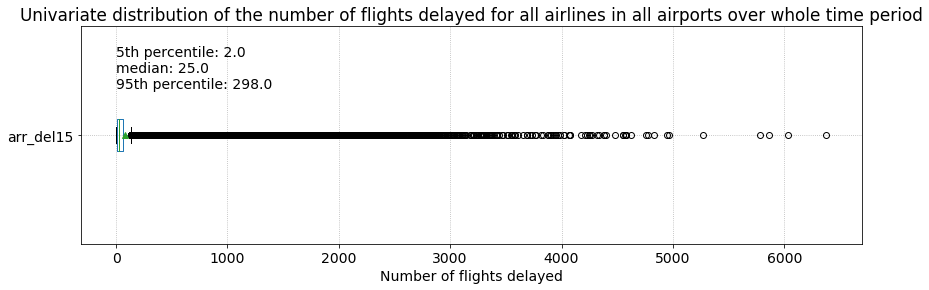

In [9]:
plt.figure(figsize=(14,4))
df.loc[:,['arr_del15']].boxplot(vert=False,showmeans=True)
plt.grid(linestyle=':')
perc=np.percentile(df.loc[:,['arr_del15']],[5,50,95])
plt.text(0,1.2,'5th percentile: {}\nmedian: {}\n95th percentile: {}'.format(perc[0],perc[1],perc[2]),verticalalignment='bottom')
plt.title('Univariate distribution of the number of flights delayed for all airlines in all airports over whole time period')
plt.xlabel('Number of flights delayed')
plt.show()

Considering all airports and all airline companies over the whole time period from January 2004 to April 2020, the number of flights per month varies from 0 to more than 6,000. The average number of flights is of about 25 per month for a given company in a given airport, varying 2 to 298 for 90% of the airlines and airports. 

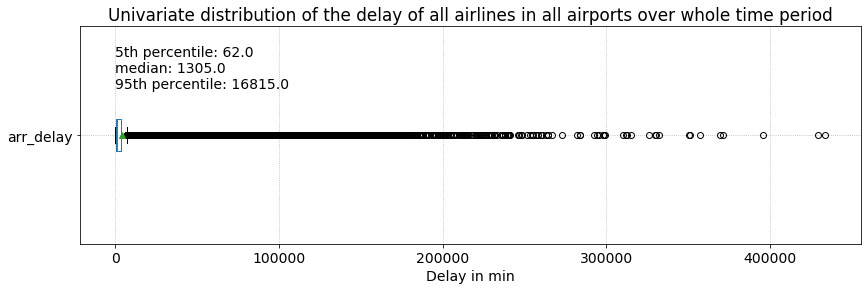

In [18]:
plt.figure(figsize=(14,4))
df.loc[:,['arr_delay']].boxplot(vert=False,showmeans=True)
plt.grid(linestyle=':')
plt.title('Univariate distribution of the delay of all airlines in all airports over whole time period')
plt.xlabel('Delay in min')
perc=np.percentile(df.loc[:,['arr_delay']],[5,50,95])
plt.text(0,1.2,'5th percentile: {}\nmedian: {}\n95th percentile: {}'.format(perc[0],perc[1],perc[2]),verticalalignment='bottom')
plt.show()

The boxplot above presents the distribution of the delay time period in minutes per month for all airlines, in all airports, over the whole time period from January 2004 to April 2020. The cumulated time delay for all flights of a given airline in a given airport can exceed 400,000 minutes (about 278 days). The cumulated delay per month is mostly between 1 hour and 12 days, with an average of 3 days.

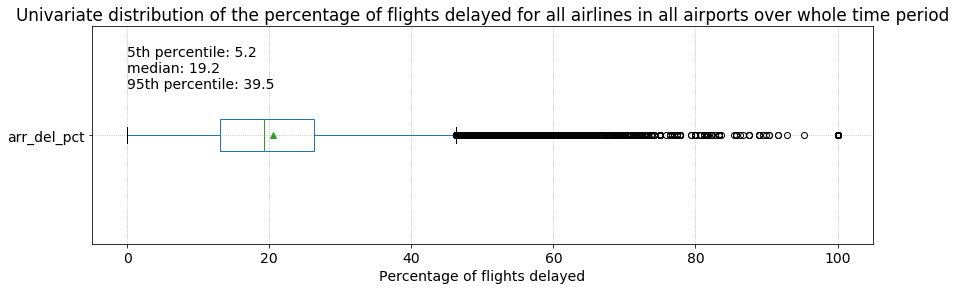

In [84]:
plt.figure(figsize=(14,4))
df.loc[:,['arr_del_pct']].boxplot(vert=False,showmeans=True)
plt.grid(linestyle=':')
perc=[round(i,1) for i in np.percentile(df.loc[:,['arr_del_pct']],[5,50,95])]
plt.text(0,1.2,'5th percentile: {}\nmedian: {}\n95th percentile: {}'.format(perc[0],perc[1],perc[2]),verticalalignment='bottom')
plt.title('Univariate distribution of the percentage of flights delayed for all airlines in all airports over whole time period')
plt.xlabel('Percentage of flights delayed')
plt.show()

Considering all airports and all airline companies over the whole time period from January 2004 to April 2020, about 20% of the flights are delayed (15 min or more) per month. 90% of the times, for an airline in a given airport, 5 to 40% of the flights are delayed per month. Also some airline in some airport presented 100% of the flights delayed during a month.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The investigation showed that a large number flights were delayed per month for a given airline company and airport during the time period from January 2004 to April 2020; also this cumulated delay can be quite significant (of several days). Some airline companies in some airport even presented 100% of the flights delayed during a month.    

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The data presented the delays in two different fashions: the number of flights delayed (more than 15 min) and the cumulated amount of time for the delay. This data is aggregated per month, for a given carrier and a given airport. It was interesting to compute the average delay per flight (knowing the total number of flights and the cumulated delay). Another point of interest was the percentage of flights delayed; this was calculated by dividing the number of flights delayed by the total number of flights. This computation was also performed for the five different causes of delay described at the beginning of the notebook.

## Bivariate Exploration

In this section, we will investigate relationships between pairs of variables in the data. We will be looking at the percentage of flights delayed and the cumulated delay over the years and for varying airline companies.

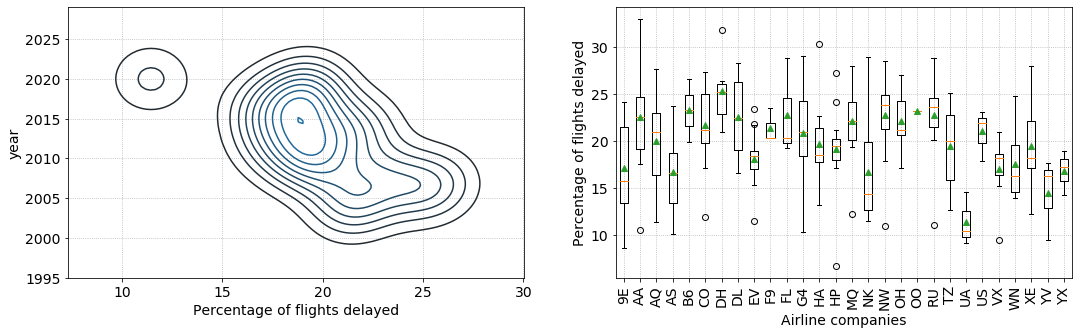

In [110]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,5))
sns.kdeplot(df.groupby('year')['arr_del_pct'].mean(),df.groupby('year')['arr_del_pct'].mean().index,ax=ax1)
ax1.grid(linestyle=':')
ax1.set_xlabel('Percentage of flights delayed')
#ax2.bar(df.groupby('carrier')['arr_del_pct'].mean().index,df.groupby('carrier')['arr_del_pct'].mean())
ax2.boxplot([df.loc[df.carrier==arl].groupby('year').mean()['arr_del_pct'] for arl in df.carrier.unique()],showmeans=True)
plt.xticks(range(1,1+len(df.carrier.unique())),df.groupby('carrier')['arr_del_pct'].mean().index, rotation='vertical')
ax2.set_ylabel('Percentage of flights delayed')
ax2.set_xlabel('Airline companies')
ax2.grid(linestyle=':')
plt.show()

We can see again on the first plot on the left that overall 20% of the flights are delayed from 2010 to 2019. In 2020, only four months of data is available and the percentage of flights delayed is smaller (around 12%). From 2000 to 2009, the percentage of flights delayed was higher (22 to 25%). We can observe an improvement through time.

The second plot on the right presents the distribution of the yearly average of the percentage of flights delayed for each airline. This plot gives an idea of the variability in flights delayed from one company to another. For instance, "UA" airline presents a low percentage of flights delayed (12% in average) and through the whole period from 2004 to 2020; while "AA" airline presents the maximum percentage of about 33% over the whole time period.

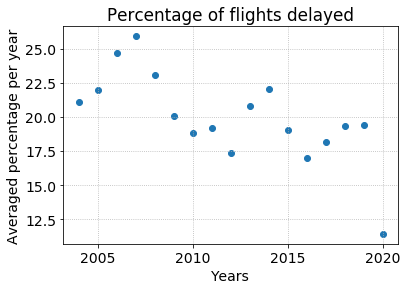

In [91]:
plt.figure()
plt.scatter(df.groupby('year')['arr_del_pct'].mean().index,df.groupby('year')['arr_del_pct'].mean())
plt.xlabel('Years')
plt.title('Percentage of flights delayed')
plt.ylabel('Averaged percentage per year')
plt.grid(linestyle=':')
plt.show()

The scatter plot above confirms what was observed earlier in the joint distribution plot, the averaged percentage of flights delayed per year is decreasing.

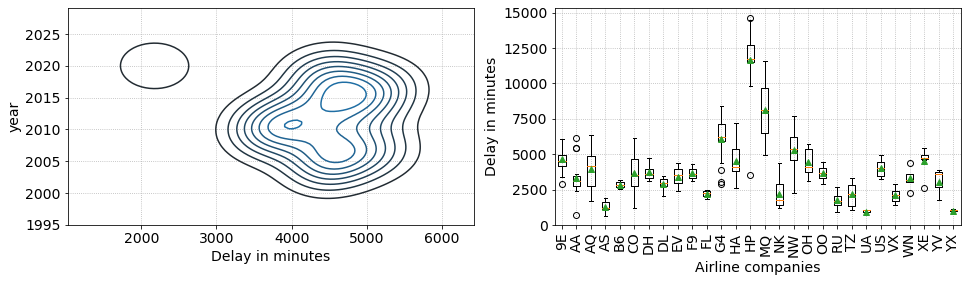

In [111]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
sns.kdeplot(df.groupby('year')['arr_delay'].mean(),df.groupby('year')['arr_delay'].mean().index,ax=ax1)
ax1.grid(linestyle=':')
ax1.set_xlabel('Delay in minutes')
ax2.boxplot([df.loc[df.carrier==arl].groupby('year').mean()['arr_delay'] for arl in df.carrier.unique()],showmeans=True)
plt.xticks(range(1,1+len(df.carrier.unique())),df.groupby('carrier')['arr_delay'].mean().index, rotation='vertical')
ax2.set_ylabel('Delay in minutes')
ax2.set_xlabel('Airline companies')
ax2.grid(linestyle=':')
plt.show()

The graph on the left presents the cumulated delay by airlines in a given airport over the years. It presents a similar pattern as seen before for the percentage of flights delayed for the year 2020 with a smaller cumulated delay of 2,000 minutes (about 1.5 days) since we only have four months of data compared to the other years. For the previous years, the cumulated delay varies between 4,000 and 5,000 minutes (3 and 3.5 days), decreasing from 2000 to 2010 and increasing again until 2015.

The second graph on the right shows the distribution of the yearly averaged, monthly cumulated delay for each airline. "UA" airline that was showing a low percentage of flights delayed is also showing a low cumulated delay. Other airlines, such as "FL" are showing a low cumulated delay even though their percentage of flights delayed was high. This could be explained by the fact that even though the delays were frequent, they were short for that airline.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The dataset showed that the averaged percentage of flights delayed per year is decreasing from 2004 to 2020. This was first oberved in the joint distribution plot of the percentage of flights delayed per year. However this finding could not be observed when looking at the average cumulated delay per year. A high variability in percentage of flights delayed from one airline company to another was also observed. 


## Multivariate Exploration

In the following plots we will be investigating together the main features (percentage of flights delayed and cumulated delay) as well as the features of interest (the distribution per year and per airline). 

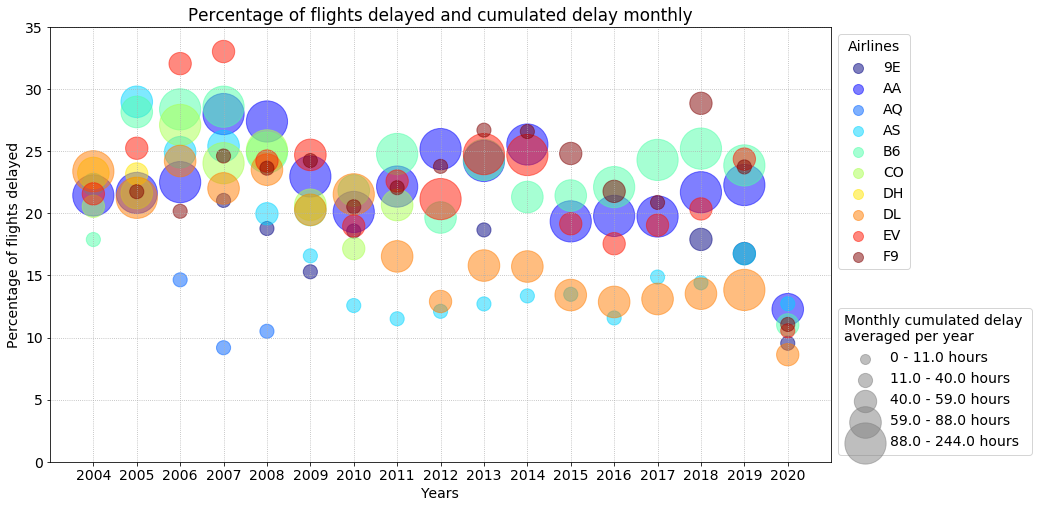

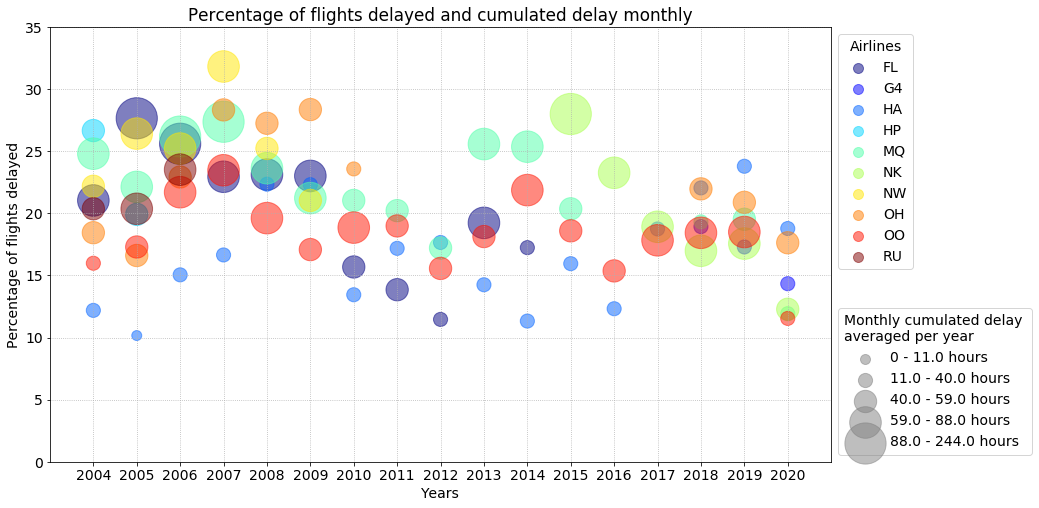

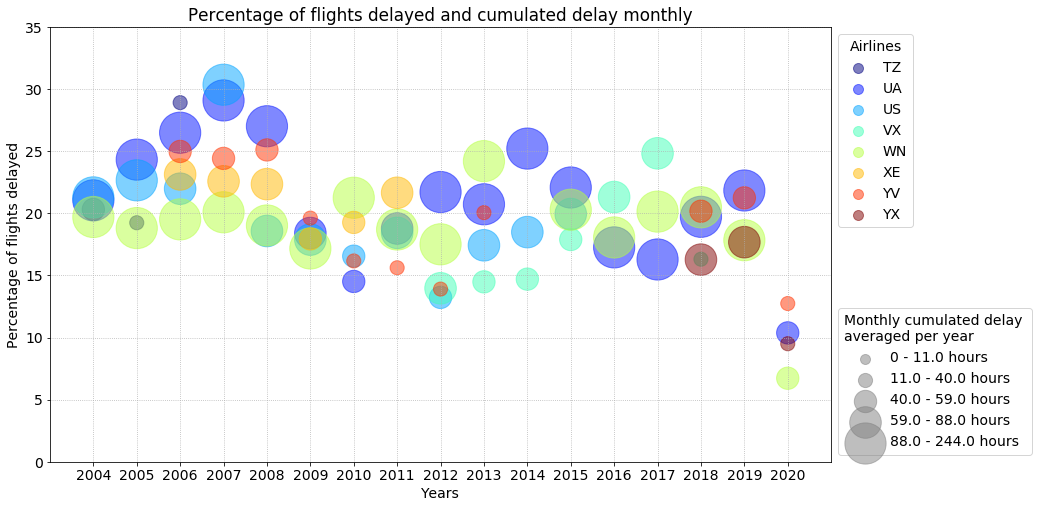

In [317]:
ds=df.groupby(['carrier','year'])[['arr_del_pct','arr_delay']].mean()#.sort_values(by='arr_del_pct')
ds['arr_del_pct_binned']=1+(pd.cut(ds['arr_del_pct'],range(0,50,10),labels=False))**3
_,bins=pd.qcut(ds.arr_delay,4,labels=False,retbins=1)
bins=[round(i) for i in bins]
bins.insert(0,0)
ds['arr_delay_binned']=1+(pd.cut(ds.arr_delay,bins,labels=False))**2
carriers=sorted(df.carrier.unique())

def plot_carriers(carriers):
    cmap=plt.cm.get_cmap('jet',len(carriers))#nipy_spectral,tab20,jet
    mult_s=100
    plt.figure(figsize=(14,8))
    for idx in range(len(carriers)):
        arl=carriers[idx]
        plt.scatter(ds.loc[(arl,)].index.values,ds.loc[(arl,),'arr_del_pct'].values,alpha=.5,color=cmap(idx),s=mult_s*ds.loc[(arl,),'arr_delay_binned'].values)
    plt.grid(linestyle=':')
    plt.xlim(2003,2021)
    plt.ylim(0,35)#ds.loc[(carriers,),'arr_delay'].max()+500
    plt.xticks(range(2004,2021))
    plt.xlabel('Years')
    plt.title('Percentage of flights delayed and cumulated delay monthly')
    plt.ylabel('Percentage of flights delayed')
    ax_leg_col=[plt.scatter(0,0,alpha=.5,color=cmap(idx),s=100) for idx in range(len(carriers))]
    ax_leg_size=[plt.scatter(0,0,alpha=.5,color='grey',s=mult_s*idx) for idx in sorted(ds.arr_delay_binned.unique())[:-1]]
    leg_col=plt.legend(ax_leg_col,carriers,bbox_to_anchor=(1,1.),title='Airlines',loc='upper left')
    plt.legend(ax_leg_size,[str(round(bins[i]/60))+' - '+str(round(bins[i+1]/60))+' hours' for i in range(len(bins)-1)],
               bbox_to_anchor=(1,0),loc='lower left',title='Monthly cumulated delay \naveraged per year')
    plt.gcf().add_artist(leg_col)
    plt.show()

plot_carriers(carriers[:10])
plot_carriers(carriers[10:20])
plot_carriers(carriers[20:])

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The previous scatter plots present the percentage of flights delayed and the monthly cumulated delay in minutes averaged per year. The delays are presented for different airlines, differentiated by colours, through the years from 2004 to 2020. The cumulated delay is presented by the position on the y-axis through the years on the x-axis. The percentage of flights delayed is represented by the marker size for each year of each airline. The data is presented into three different plots to avoid too much overlapping and improve the visibility, since there are 28 different airlines.

We can observe the trend noticed previously showing a reduction of the percentage of flights delayed from 2004 to 2020. This trend can be seen for most of the airlines, an additional information that was not available earlier. This means that some improvements have been made in the technologies and/or processes used by the airlines. Also we can see that, in general, the airlines showing higher percentage of flights delayed also have higher cumulated delay; this could be expected. The observation made earlier on the "FL" airline showing higher percentage of flights delayed but a low cumulated delay can be explained from the second graph by looking at the evolution of the airline through the years and its delays.

Some addtional steps for this analysis could look into the causes of delay and see which ones are more important and how they evolved throough the years.